In [1]:
import os
os.chdir("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob

from lib import *

%matplotlib inline

# Задача

**Требуется:** предложить модель, сегментирующую человека на фотографии.  
  
**Вход:** фотография 320x240x3.  
**Выход:** маска человека 320x240.  
**Метрика:** [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient).  
  
  
Данные представляют из себя набор фотографий человека и маски, определяющей положение человека на фотографии.  
Доступные данные разделены на несколько папок:  
- `train` содержит фотографии 320x240x3;
- `train_mask` содержит маски для фотографий из `train` 320x240;
- `valid` содержит фотографии 320x240x3;
- `valid_mask` содержит маски для фотографий из `valid` 320x240;
- `test` содержит фотографии 320x240x3.  
  
Для лучшей модели требуется создать 2 файла, которые необходимы для валидации Вашего решения:  
- сохраненные маски для картинок из `valid` в формате `pred_valid_template.csv`;
- html страницу с предсказанием модели для всех картинок из `test` и папку с используемыми картинками в этой html странице.  
  
Также необходимо:
- подготовить код для проверки (докстринги, PEP8);
- создать отчет (можно прямо в ноутбуке) с описанием Вашего исследования, гипотез и т.п.

Примеры приведены ниже.

---

# Данные, метрики и доступные функции

Посмотрим на данные:

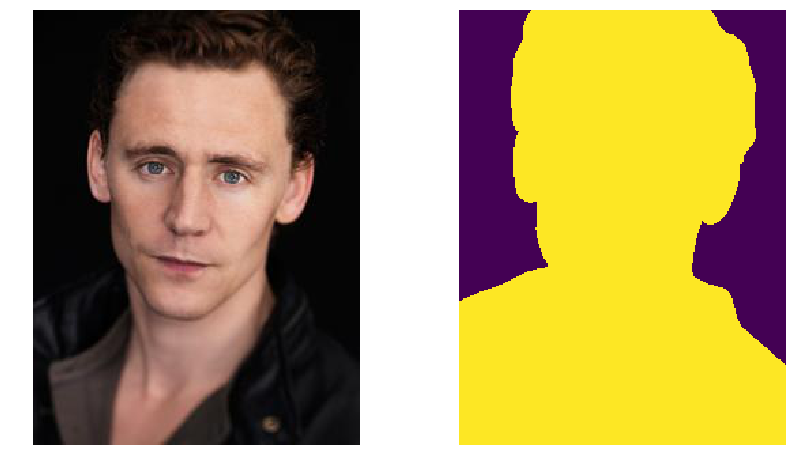

In [2]:
path = "data/train"
images = os.listdir(path)
ind = np.random.choice(images).split(".")[0]

img = np.array(Image.open(f"{path}/{ind}.jpg"))
mask = np.array(Image.open(f"{path}_mask/{ind}.png"))
show_img_with_mask(img, mask)

Пример подсчета метрики:

In [3]:
random_mask = np.random.randint(low=0, high=2, size=mask.shape)
get_dice(mask, random_mask)

0.6012202346924982

Можно для последовательности масок вычислить среднее значение метрики:

In [4]:
random_masks_1 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
random_masks_2 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
get_dice(random_masks_1, random_masks_2)

0.4988093900009905

Пример использования функций `encode_rle` и `decode_rle`:
1. Функция `encode_rle` используется для кодирования маски в строку для последующей записи в файл;
2. Функция `decode_rle` используется для восстановления маски по закодированной строке.

In [5]:
rle_mask = encode_rle(mask)
rle_mask

'54 132 293 134 532 136 772 136 1011 138 1251 139 1490 140 1730 140 1969 142 2209 142 2449 143 2688 144 2928 145 3168 146 3408 147 3648 148 3888 149 4128 151 4368 155 4608 156 4848 157 5088 159 5327 161 5567 162 5806 164 6046 165 6285 166 6525 167 6764 168 7004 168 7243 169 7483 170 7722 171 7962 171 8202 172 8441 173 8681 173 8921 173 9161 173 9401 173 9641 173 9881 174 10121 174 10361 174 10601 175 10841 175 11081 175 11321 176 11561 176 11800 177 12040 178 12280 178 12520 178 12760 178 13000 179 13240 179 13479 180 13719 180 13959 180 14199 180 14439 179 14679 179 14919 179 15159 179 15399 179 15639 179 15879 179 16119 179 16359 179 16599 179 16839 179 17079 179 17320 178 17560 178 17800 178 18040 178 18280 178 18520 178 18760 178 19000 178 19240 178 19480 178 19721 177 19961 177 20201 177 20442 176 20682 176 20922 177 21163 176 21405 174 21644 175 21884 175 22123 176 22363 176 22603 176 22842 176 23082 176 23322 175 23562 175 23802 174 24042 173 24281 173 24521 173 24761 172 25001 

Теперь восстановим маску:

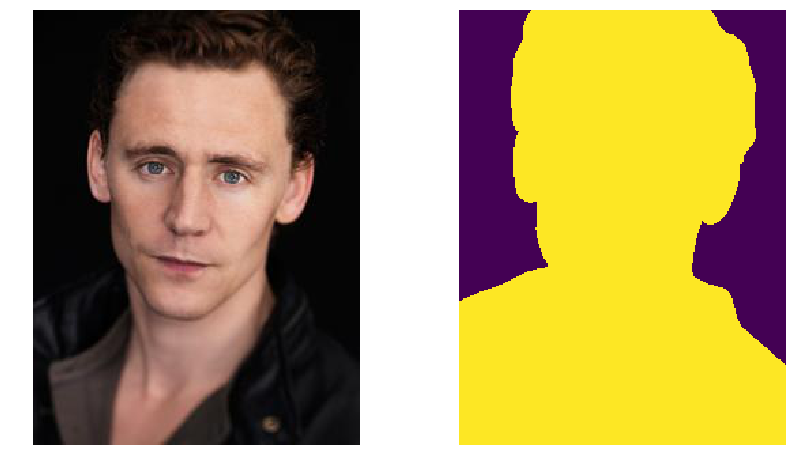

In [6]:
decoded_mask = decode_rle(rle_mask)
show_img_with_mask(img, decoded_mask)

---

# Результаты

Пример файла для изображений из `data/valid`:  
_Каждую предсказанную маску для изображения из `valid` необходимо закодировать и записать в показанный ниже файл, который служит примером, именно в таком виде нужно будет представить результат Вашего лучшего решения на данных из `valid`._

In [7]:
pred = pd.read_csv("data/pred_valid_template.csv")
pred.head()

,id,rle_mask
0,1315,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
1,1316,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
2,1317,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
3,1318,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
4,1319,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...


Для данных из `test` требуется создать html страницу + картинки для нее.  
Это можно сделать с помощью функции `get_html`, как показано ниже.

In [8]:
paths_to_imgs = sorted(glob("data/valid/*"))
pred_masks = [np.array(Image.open(path)) for path in sorted(glob("data/valid_mask/*"))]

_ = get_html(paths_to_imgs, pred_masks, path_to_save="results/example")

В папке `results` создался файл `example.html` и папка `examples` с используемыми картинками.